In [6]:
from pathlib import Path
import geopandas as gpd
import pycountry
import json

BASE = Path('.').resolve().joinpath('data/for_db/geo')

with open(BASE.joinpath('init.json'), 'r') as f:
    geo = json.load(f)
print(geo.keys())    

dict_keys(['project_description', 'topics', 'geometry'])


<AxesSubplot: >

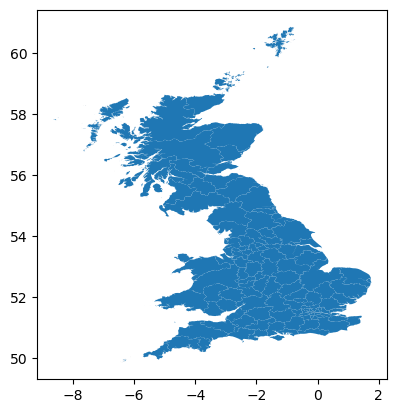

In [9]:
postcode = gpd.GeoDataFrame.from_features(geo['geometry']['features'])
postcode.to_file('GEODATA.gpkg', layer='postcode_areas', driver='GPKG')
postcode.plot()

In [10]:
global_gdf = gpd.read_file(BASE.joinpath('world_med.geo.json'))
global_gdf

,iso_a2,su_dif,iso_a3,iso,geometry
0,CU,0,CUB,192,"MULTIPOLYGON (((-81.83745 23.16304, -81.57544 ..."
1,DO,0,DOM,214,"POLYGON ((-71.76831 18.03916, -71.76377 18.203..."
2,NI,0,NIC,558,"POLYGON ((-83.15752 14.99307, -83.18535 14.956..."
3,GT,0,GTM,320,"POLYGON ((-92.23516 14.54541, -92.20903 14.571..."
4,MF,0,MAF,663,"POLYGON ((-63.01118 18.06895, -63.12305 18.068..."
...,...,...,...,...,...
231,RU,0,RUS,643,"MULTIPOLYGON (((47.98301 45.48823, 47.96768 45..."
232,UA,0,UKR,804,"MULTIPOLYGON (((35.02285 45.70098, 35.26016 45..."
233,MV,0,MDV,None,"MULTIPOLYGON (((72.89986 7.10625, 72.90403 7.1..."
234,MU,0,MUS,None,"MULTIPOLYGON (((57.33681 -20.46764, 57.33875 -..."


In [14]:
def get_country_name(row):
    iso = row.iso_a3
    try:
        country = pycountry.countries.get(alpha_3=iso).name
    except Exception as e:
        country = iso
    return country

global_gdf['country'] = global_gdf.apply(get_country_name, axis=1)
global_gdf = global_gdf[['iso_a3', 'iso', 'country', 'geometry']]
global_gdf.to_file('GEODATA.gpkg', layer='countries', driver='GPKG')

In [15]:
postcode.head()

,geometry,cat,pc_area
0,"POLYGON ((-0.13555 51.51064, -0.13258 51.51324...",1,WD
1,"POLYGON ((-0.13561 51.51072, -0.13455 51.51054...",2,WB
2,"POLYGON ((-0.15900 51.51265, -0.16054 51.51136...",3,WH
3,"POLYGON ((-0.15904 51.51261, -0.15774 51.51316...",4,WC
4,"POLYGON ((-0.15900 51.51265, -0.15827 51.51341...",5,WK
